# Contextualización Ciencia de datos e inteligencia artificial.

Autor              :, C.PULZARA 
#### Material Referencia: Ver bibliografía de presentación.

## Redes Neuronales usando librerías


Que desarrollos nos facilitan construir modelos de redes neuronales?
TensorFlow, Theano, Microsoft congnitive, Keras, pytorch...

## Redes neuronales profundas


In [99]:
# Modelo: Estimar el posible abandono de un cliente bancario
# importando librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importando base de datos
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [100]:
# Variables relevantes (características) y conclusión de abandono (clase)

X = dataset.iloc[:, 3:13].values
Y = dataset.iloc[:, 13].values

# note que las columnas iniciales 4 y 5 son categóricas (Geography, Gender), para la nueva asignación (X) son las columnas  índice 1 y 2

X


array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [101]:
print(X.shape)
print(Y.shape)

(10000, 10)
(10000,)


In [102]:
# manejo de categóricos como características
from sklearn.preprocessing import LabelEncoder  #(categórico como entero) Note Que se está usando un preprocesamiento sugerido para clases no para características
labelencoder_X_1 = LabelEncoder() 
X[:,1] = labelencoder_X_1.fit_transform(X[:,1]) 
labelencoder_X_2 = LabelEncoder() 
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
X
# si es necesario se transforma el entero de País en una matriz binaria (mejoras a los modelos posibles) Onehotencoder

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [103]:
labelencoder_X_1.transform(['France', 'Germany', 'Spain'])

array([0, 1, 2])

In [104]:
# división de datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [105]:
# reescalando las características
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [106]:
sc.var_

array([9.39279023e+03, 6.80536234e-01, 2.48107750e-01, 1.10263720e+02,
       8.41069961e+00, 3.88506440e+09, 3.43249859e-01, 2.07306109e-01,
       2.49744000e-01, 3.31584964e+09])

In [107]:
# Cargado de arquitectura de redes con Keras 
import keras 
from keras.models import Sequential 
from keras.layers import Dense

In [108]:
# inicializa modelo de datos, en este caso red Sequential, es decir red neuronal de arquitectura secuencial
classifier = Sequential()

In [109]:
# Primera capa, capa de entrada con método Dense, no obstante esta arquitectura y su orden se arma mediante el método add
# Otras formas de estructurar la arquitectura de la DNN, depende mucho de la versión y la librería de AA empleada


# capa de entrada :: Es la única capa que define las variables de entrada (10 entradas)
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10)) # pesos 10 @ 6

"""
Dense implementa la operación  output = activation(dot(input, kernel) + bias), donde kernel son los pesos de las matrices
input las variables de entradas y bias la variable vector independiente

Alguno de los parámetros son:

units
Número de unidades o neuronas en la capa de salida

activation 
Tipo de función de activación a emplear (https://www.tensorflow.org/api_docs/python/tf/keras/activations)

use_bias
Activa en True, el uso del vector bias o variables independientes

kernel_initializer 
Tipo de inicializador en los pesos del kernel

bias_initializer
tipo de inicializador de vector variables independientes.

kernel_regularizer
Función regularizadora para los pesos de la matriz de la RN

bias_regularizer represents the regularizer function to be applied to the bias vector.

activity_regularizer 
Regulariza el resultado de salida en la capa.

kernel_constraint 
función de restricción a los pesos de la capa.

bias_constraint 
función de restrucción a los bias de la capa.



Otra forma más actual (2023)

model = Sequential() 
layer_1 = Dense(16, input_shape = (8,))
model.add(layer_1)
layer_1.input_shape #  8 entradas
    (None, 8) 
layer_1.output_shape  # 16 salidas
    (None, 16)

Note la necesidad de incluir en el modelo la capa, de otra forma queda desconectada y presentará error


"""

'\nDense implementa la operación  output = activation(dot(input, kernel) + bias), donde kernel son los pesos de las matrices\ninput las variables de entradas y bias la variable vector independiente\n\nAlguno de los parámetros son:\n\nunits\nNúmero de unidades o neuronas en la capa de salida\n\nactivation \nTipo de función de activación a emplear (https://www.tensorflow.org/api_docs/python/tf/keras/activations)\n\nuse_bias\nActiva en True, el uso del vector bias o variables independientes\n\nkernel_initializer \nTipo de inicializador en los pesos del kernel\n\nbias_initializer\ntipo de inicializador de vector variables independientes.\n\nkernel_regularizer\nFunción regularizadora para los pesos de la matriz de la RN\n\nbias_regularizer represents the regularizer function to be applied to the bias vector.\n\nactivity_regularizer \nRegulariza el resultado de salida en la capa.\n\nkernel_constraint \nfunción de restricción a los pesos de la capa.\n\nbias_constraint \nfunción de restrucción

In [110]:
# Segunda capa oculta
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))   # recibe 6 neuronas y entrega 6

In [111]:
# Tercera capa, capa de salida para simplificar
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # recibe 6 y entrega 1

In [112]:
# Compilación de la red neuronal
# https://www.tutorialspoint.com/keras/keras_model_compilation.htm
# https://keras.io/api/models/model_training_apis/

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()  # con este se ve la arquitectura montada

# Entre sus argumentos destaca
# Optimizer. 
# Este es el algoritmo utilizado para encontrar el conjunto óptimo de ponderaciones (pesos de las matrices). SGD, adam, adagrad, rmsprop, ... 
# 
# loss
# Función de pérdida o función de minimización empleada en la optimización. 
# https://www.tensorflow.org/api_docs/python/tf/keras/losses; binary_crossentropy, categorical_crossentropy:
# Si nuestra variable dependiente es binaria, usamos la función de pérdida logarítmica llamada “binary_crossentropy”, 
# y si nuestra variable dependiente tiene más de dos categorías en la salida, entonces usamos “categorical_crossentropy”. 

# metrics
# Función que evalúa el desempeño de aciertos del modelo de  diseñado, se usa pos-entrenamiento.
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 6)                 66        
                                                                 
 dense_14 (Dense)            (None, 6)                 42        
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 115 (460.00 Byte)
Trainable params: 115 (460.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
# Entrenamiento (ajuste pesos) de la arquitectura implementada con las funciones de optimización dadas.
classifier.fit(X_train, y_train, batch_size = 10, epochs = 5)

# Se destaca:
# X_train para caracerísticas y y_train para las clases. 
# batch_size
# número de datos en forma de paquete del conjunto total de datos para ser ingresados a la RN en cada interación
# epochs
# Número de veces en que se pasan todos los datos dispónibles de entremiento por la red neutronal
# 
# Para este ejemplo, el tamaño del lote es el número de observaciones después de lo cual actualizamos los pesos, 
# es decir pasan 10 datos y actualiza pesos, como entran de a 10 datos se tiene que recorrer 800 paquetes 
# para completar los 8000 del conjunto total de datos, teniendo barrido solo una época
# Época es el número total de iteraciones, es decir la cantidad de veces que se pasan los 8000 datos a la red, para ajustar pesos
# Los valores de tamaño de lote y época se eligen mediante el método de prueba y error.



Epoch 1/5
800/800 [==============================] - 1s 1ms/step - loss: 0.4999 - accuracy: 0.7962
Epoch 2/5
800/800 [==============================] - 1s 1ms/step - loss: 0.4311 - accuracy: 0.7970
Epoch 3/5
800/800 [==============================] - 1s 1ms/step - loss: 0.4255 - accuracy: 0.7970
Epoch 4/5
800/800 [==============================] - 1s 1ms/step - loss: 0.4219 - accuracy: 0.8071
Epoch 5/5
800/800 [==============================] - 1s 1ms/step - loss: 0.4189 - accuracy: 0.8261


In [114]:
# las predicciones es un porcentaje de abandono, dado que la última capa empleó una sigmoide, donde 0 no abandona y 1 abandona 100%
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

# note que los valores de entrada son datos escalados como se requiere para el entrenamiento
# Para este caso se asume que si la probaiblibdad supera el 50%, se considera un abandono

63/63 [==============================] - 0s 913us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# '''            Actual values
    
#     predicted values  TP    FP
#                        FN    TN
# '''
cm


array([[1570,   17],
       [ 344,   69]], dtype=int64)

In [116]:
# Predicción de un registro
new_prediction = classifier.predict(sc.transform(np.array([X[2,:]])))
new_prediction = (new_prediction > 0.5)
print(new_prediction)
Y[2]

1/1 [==============================] - 0s 17ms/step
[[False]]


1

In [ ]:
# Persistencia de modelo o guardado de modelo
""" 
Para modelos de sklearn se puede usar joblib

Sea clf un modelo clasificador previamente ajustado
from sklearn.externals import joblib
joblib.dump(clf, "path con nombre Modelo Guardado SKLEARN.pkl")

según versiones puede funcionar simplemente
import joblib


para usarlo el modelo de librería serializado (pickle, se emplea load
https://scikit-learn.org/stable/model_persistence.html

clf = joblib.load("path con nombre Modelo Guardado SKLEARN.pkl")

luego se puede usar

clf.score(datos a probar, resultados esperados)  para ver si el rendimiento es bueno

Lo anterior aplica para el guardado de modelos de ML y transformaciones tales como preprocesamientos

"""

In [ ]:
# Persistencia de modelo o guardado de modelo
"""
https://www.tensorflow.org/guide/keras/save_and_serialize
https://keras.io/api/models/model_saving_apis/

Para Salvar modelos en Keras se procede:

model.save("path con nombre de archivo, no va con extensión en caso de ser Tensorflow o bien h5 para HDF5")

# para cargar el modelo guardado
clf = keras.models.load_model("path del archivo modelo guardado sin extensión")

# Para ver arquitectura 
clf.summary()
"""

In [117]:
classifier.save("ModeloAbandonoCliente") # sin formato genera una carpeta, en cambio con h5 genera un único archivo
# 'tf' en TF 2.X, y  'h5' en TF 1.X

INFO:tensorflow:Assets written to: ModeloAbandonoCliente\assets


INFO:tensorflow:Assets written to: ModeloAbandonoCliente\assets


In [118]:
clf = keras.models.load_model("ModeloAbandonoCliente")

# Para ver arquitectura 
clf.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 6)                 66        
                                                                 
 dense_14 (Dense)            (None, 6)                 42        
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 115 (460.00 Byte)
Trainable params: 115 (460.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Persistencia de modelo o guardado de modelo cada cierto batch size o época
"""
Para lo anterior se procede a crear archivos de extensión *.ckpt

checkpoint_path = "path.ckpt"

crea un llamador de salvado de pesos 
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, save_weights_only = True, verbose = 1)
Verbose = 1 presenta mensajes a cada despliegue o entrenamiento del modelo

# se entrena modelo con pesos
model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels), callbacks = [cp_callback])


# para cargar los pesos
# crea y compila un nuevo modelo y luego le carga pesos

model.load_weights(checkpoint_path)

"""

In [120]:

# Si se quisiera conservar los pesos de cada resultado de entrenamiento, se procede a:
# https://www.youtube.com/watch?v=DffrR2iEY2U

checkpoint_path = "./CheckPoints/cp-{epoch:04d}.ckpt"

cp_callback = keras.callbacks.ModelCheckpoint(
    filepath= checkpoint_path,
    verbose = 1,
    save_weights_only = True,
    period = 5                               )
                                                
# Cada 5 épocas graba los pesos
# Verbose=0 (silent); Verbose=2 (one line per epoch)


# crea un nuevo modelo y como se presenta en secuencial en líneas de código, se suele crear como clase o función, 
# para así retornar un único bloque editable y llamable (modelo configurado)
# model = 
model = Sequential()
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.save_weights(checkpoint_path.format(epoch=0))

# Entrena modelo  # poner  batch_size=10
model.fit(X_train, y_train,epochs = 50, batch_size=10,
            validation_data = (X_test, y_test), 
            callbacks = [cp_callback],   
            verbose = 1)
# este es con el nuevo cp_callback que ya viene configurado para el guardado
# Se carga el archivo ckpt que contiene los pesos, por ende se cargan pesos

# Si verbose > 0, el informe de logs es :

# loss: valor de función de perdidas con datos de entrenamiento
# acc: exactitud con datos entrenamiento

# Si los datos de validation_data o validation_split no son vacíos se complementa con :

# val_loss: valor función de perdidas con datos de validación
# val_acc: exactitud con datos de validación


Epoch 1/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4966 - accuracy: 0.7966 - val_loss: 0.4395 - val_accuracy: 0.7935
Epoch 2/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4339 - accuracy: 0.7970 - val_loss: 0.4370 - val_accuracy: 0.7935
Epoch 3/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4304 - accuracy: 0.7970 - val_loss: 0.4324 - val_accuracy: 0.7935
Epoch 4/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4261 - accuracy: 0.7970 - val_loss: 0.4264 - val_accuracy: 0.7935
Epoch 5/50
782/800 [============================>.] - ETA: 0s - loss: 0.4228 - accuracy: 0.8104
Epoch 5: saving model to ./CheckPoints\cp-0005.ckpt
800/800 [==============================] - 1s 2ms/step - loss: 0.4224 - accuracy: 0.8105 - val_loss: 0.4254 - val_accuracy: 0.8160
Epoch 6/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4189 - accuracy: 0.8254 - val_loss: 0.4232 - val_accuracy: 0.8210
Epoch 7/50


In [124]:
model.load_weights("./CheckPoints/cp-0025.ckpt")
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 6)                 66        
                                                                 
 dense_17 (Dense)            (None, 6)                 42        
                                                                 
 dense_18 (Dense)            (None, 1)                 7         
                                                                 
Total params: 115 (460.00 Byte)
Trainable params: 115 (460.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [125]:
model0 = Sequential()
model0.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model0.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
model0.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model0.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model0.fit(X_train, y_train, batch_size = 10, epochs = 2)


Epoch 1/2
800/800 [==============================] - 2s 1ms/step - loss: 0.4930 - accuracy: 0.7965
Epoch 2/2
800/800 [==============================] - 1s 1ms/step - loss: 0.4306 - accuracy: 0.7970
63/63 - 0s - loss: 0.4325 - accuracy: 0.7935 - 147ms/epoch - 2ms/step
Untrained model, accuracy: 79.35%
63/63 - 0s - loss: 0.4074 - accuracy: 0.8275 - 152ms/epoch - 2ms/step
Trained model, accuracy: 82.75%


In [ ]:
# Evaluate the model0
loss, acc = model0.evaluate(X_test, y_test, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

# Evaluate the model ckpt 25
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Trained model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:

# Otro recurso de guardado https://www.aprendemachinelearning.com/una-sencilla-red-neuronal-en-python-con-keras-y-tensorflow/

# # serializar el modelo a JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serializar los pesos a HDF5
# model.save_weights("model.h5")
# print("Modelo Guardado!")
 
 
# # cargar json y crear el modelo
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # cargar pesos al nuevo modelo
# loaded_model.load_weights("model.h5")
# print("Cargado modelo desde disco.")
 
# # Compilar modelo cargado y listo para usar.
# loaded_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


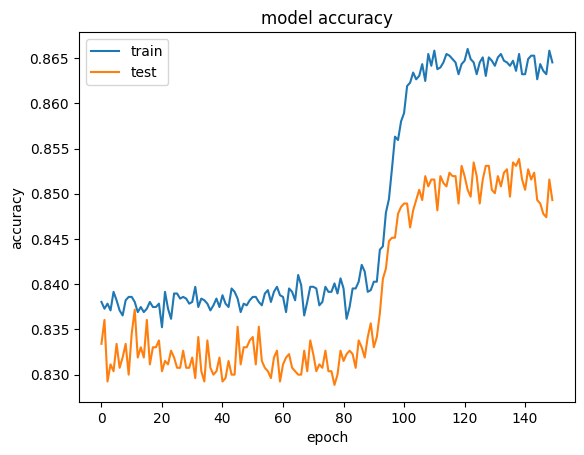

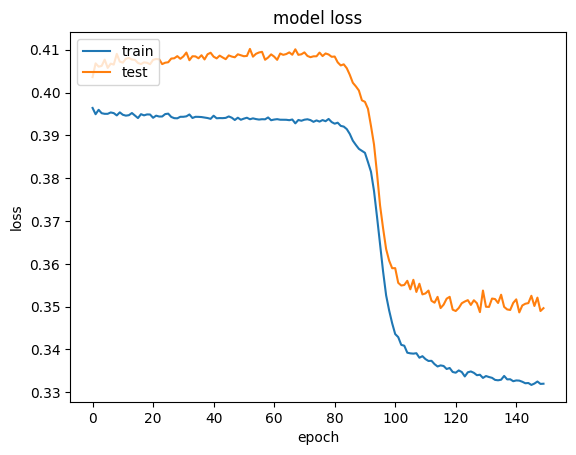

In [126]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Preprocesamiento de tuplas de características y clases


In [127]:
#importing MultiLabelBinarizer
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer


In [128]:
df = pd.DataFrame({"genre": [["action", "drama","fantasy"], ["fantasy","action"], ["drama"], ["sci-fi", "drama"]]})
df

,genre
0,"[action, drama, fantasy]"
1,"[fantasy, action]"
2,[drama]
3,"[sci-fi, drama]"


In [129]:
#instantiating MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df = pd.DataFrame(mlb.fit_transform(df['genre']),columns=mlb.classes_)

In [130]:
df

,action,drama,fantasy,sci-fi
0,1,1,1,0
1,1,0,1,0
2,0,1,0,0
3,0,1,0,1


In [131]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[["bad", "average", "good"]]) # en este mismo orden genera los enteros bad=>0; average=>1; good=>2
encoder.fit_transform([["good"], ["bad"], ["bad"], ["average"]])
# útil cuando se desea preservar una jerarquía en la transforamción, ya que el algoritmo de AA puede influenciarse 
# por el mayor valor asignado del valor de la característica, supongamos una transformación seguro 0 precausión 1 peligroso 3 


array([[2.],
       [0.],
       [0.],
       [1.]])

In [132]:
encoder

OrdinalEncoder(categories=[['bad', 'average', 'good']])